In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.load("/content/kmeans2d.npy")
print("First five elements of X are:\n", X[:5])
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [3]:
import numpy as np

def initialize_centroids(X, k):
    # Randomly select k points from the dataset as centroids
    random_index = np.random.choice(X.shape[0], k, replace=False)
    print(random_index)
    centroids = X[random_index]
    return centroids

In [4]:
# centroids = initialize_centroids(X, 3)

[193 160  97]


In [5]:
# centroids

array([[3.62202931, 1.28643763],
       [3.93616029, 1.46202934],
       [1.38133497, 5.00194962]])

In [4]:
def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid) ** 2))

In [7]:
# euclidean_distance(X[5],centroids)

6.182724204536726

In [5]:
def assign_to_centroids(X, centroids):
    labels = []
    for point in X:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        label = np.argmin(distances)  # Index of the closest centroid
        labels.append(label)
    return np.array(labels)


In [9]:
# assign_to_centroids(X,centroids)

array([2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [6]:
def update_centroids(X, labels, k):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        points_in_cluster = X[labels == i]
        new_centroids[i] = points_in_cluster.mean(axis=0)  # Calculate the mean of points in cluster
    return new_centroids


In [7]:
def k_means(X, k, max_iterations, lim=1e-4):
    centroids = initialize_centroids(X, k)
    prev_centroids = np.zeros_like(centroids)
    labels = np.zeros(X.shape[0])

    for i in range(max_iterations):
        # Assign points to nearest centroid
        labels = assign_to_centroids(X, centroids)

        # Update centroids
        centroids = update_centroids(X, labels, k)

        # Check for convergence (if centroids do not change)
        centroid_shift = np.sum((centroids - prev_centroids) ** 2)
        if centroid_shift < lim:
            print(f"Converged after {i+1} iterations.")
            break

        prev_centroids = centroids.copy()

    return centroids, labels


In [8]:
import matplotlib.pyplot as plt

def visualize_clusters(X, centroids, labels):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200, label='Centroids')
    plt.title("K-means Clustering")
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()


[231 106 191]
Converged after 4 iterations.


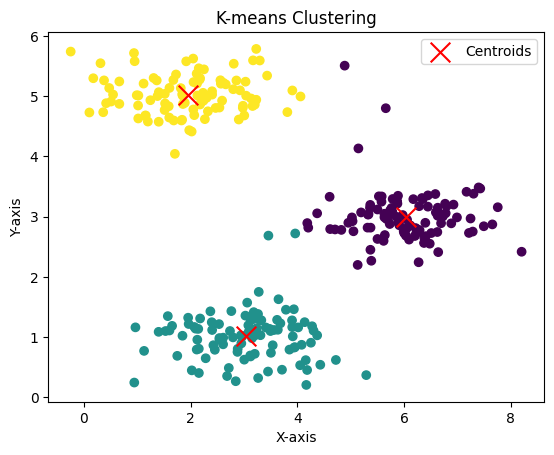

In [16]:
# Example Usage:
k = 3  # Number of clusters
#X = np.random.rand(300, 2)

centroids, labels = k_means(X, k,100)

visualize_clusters(X, centroids, labels)

Shape of original_img is: (128, 128, 3)


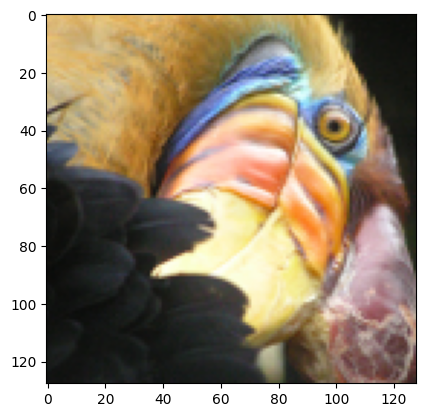

In [17]:
original_img = plt.imread('/content/bird_small.png')
plt.imshow(original_img)
print("Shape of original_img is:", original_img.shape)

In [18]:
original_img = original_img / 255
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))
X_img.shape

(16384, 3)

In [19]:
X_img

array([[0.00336794, 0.00276817, 0.00158401],
       [0.0035371 , 0.00284506, 0.00178393],
       [0.00347559, 0.00286044, 0.00169166],
       ...,
       [0.00099962, 0.00066128, 0.00059977],
       [0.00089196, 0.00056901, 0.00058439],
       [0.00079969, 0.00059977, 0.00052288]], dtype=float32)

[  915   655 15113 10369]
Converged after 1 iterations.


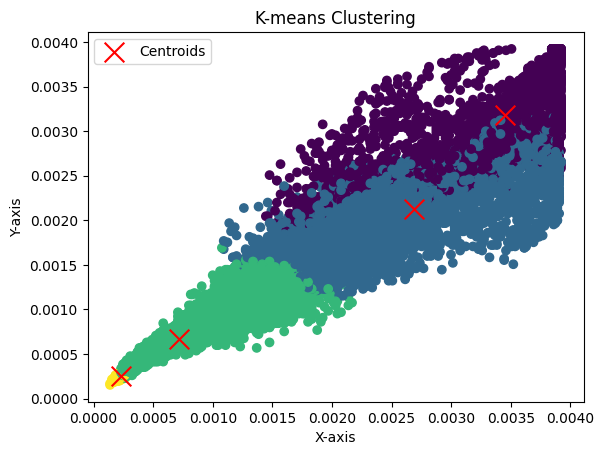

In [23]:
k = 4  # Number of clusters
#X = np.random.rand(300, 2)

centroids, labels = k_means(X_img, k,100)

visualize_clusters(X_img, centroids, labels)

In [34]:
# Replace each pixel with the centroid of its cluster
X_recovered = centroids[labels.astype(int)]

# Reshape to original dimensions
compressed_img = X_recovered.reshape(X_recovered.shape)

In [31]:
X_recovered

array([[0.00268598, 0.00213012, 0.00141967],
       [0.00345018, 0.00318612, 0.002677  ],
       [0.00268598, 0.00213012, 0.00141967],
       ...,
       [0.00071585, 0.00066824, 0.00060593],
       [0.00071585, 0.00066824, 0.00060593],
       [0.00071585, 0.00066824, 0.00060593]])

In [35]:
compressed_img

array([[0.00268598, 0.00213012, 0.00141967],
       [0.00345018, 0.00318612, 0.002677  ],
       [0.00268598, 0.00213012, 0.00141967],
       ...,
       [0.00071585, 0.00066824, 0.00060593],
       [0.00071585, 0.00066824, 0.00060593],
       [0.00071585, 0.00066824, 0.00060593]])

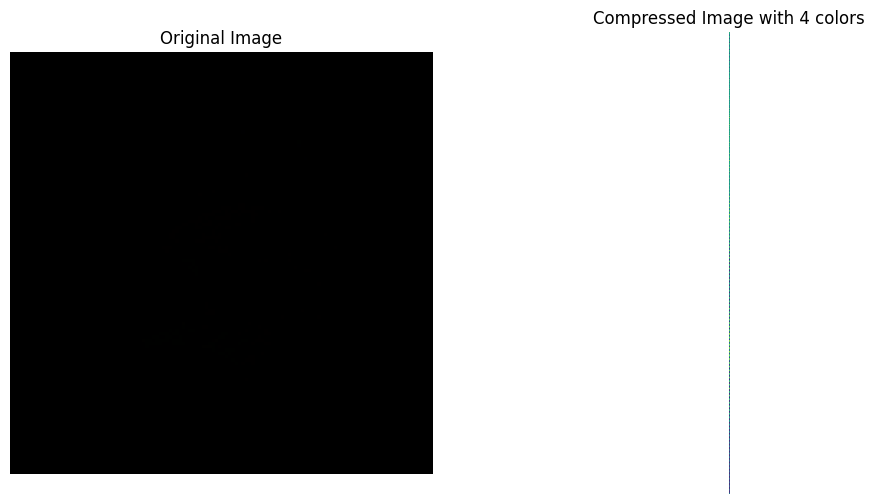

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(original_img)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(compressed_img)
ax[1].set_title(f'Compressed Image with {k} colors')
ax[1].axis('off')

plt.show()


In [ ]:
# cent1=random_row1
# cent2=random_row2

In [ ]:
# cent1

In [ ]:
# cent1[0]

In [ ]:
# cent1[1]

In [ ]:
# X[5]

In [ ]:
# X[5][0]

In [ ]:
# def cluster_k2(cent1, cent2):
#     # Initialize empty clusters
#     cluster1 = []
#     cluster2 = []

#     # Loop through the data points
#     for i in range(200):
#         dist1 = 0
#         dist2 = 0

#         # Calculate the Euclidean distances
#         dist1 = math.sqrt((X[i][0] - cent1[0])**2 + (X[i][1] - cent1[1])**2)
#         dist2 = math.sqrt((X[i][0] - cent2[0])**2 + (X[i][1] - cent2[1])**2)

#         # Assign the point to the nearest centroid
#         if dist1 < dist2:
#             cluster1.append(X[i])
#         elif dist2 < dist1:
#             cluster2.append(X[i])

#     return cluster1, cluster2

In [ ]:
# def new_centroid(cl1, cl2):
#     # Initialize variables to store the sum of coordinates
#     x1 = 0
#     y1 = 0

#     # Calculate the sum of coordinates for cluster 1
#     for i in range(len(cl1)):
#         x1 += cl1[i][0]
#         y1 += cl1[i][1]

#     # Initialize variables for cluster 2
#     x2 = 0
#     y2 = 0

#     # Calculate the sum of coordinates for cluster 2
#     for i in range(len(cl2)):
#         x2 += cl2[i][0]
#         y2 += cl2[i][1]

#     # Return the new centroids as a tuple
#     return (x1 / len(cl1), y1 / len(cl1)), (x2 / len(cl2), y2 / len(cl2))

In [ ]:
# cluster1,cluster2=cluster_k2(cent1,cent2)
# new_c1,new_c2=new_centroid(cluster1,cluster2)

# for i in range(1000):
#   cluster1,cluster2=cluster_k2(new_c1,new_c2)
#   new_c1,new_c2=0,0
#   new_c1,new_c2=new_centroid(cluster1,cluster2)

In [ ]:
# cluster2[0][0]

In [ ]:
# cluster2[0][1]

In [ ]:
# print(type(cluster1))

In [ ]:
# # Scatter plot for Cluster 1 (list-based)
# plt.scatter([point[0] for point in cluster1], [point[1] for point in cluster1], color='blue', label='Cluster 1')

# # Scatter plot for Cluster 2 (list-based)
# plt.scatter([point[0] for point in cluster2], [point[1] for point in cluster2], color='green', label='Cluster 2')

# # Plot centroids
# plt.scatter(new_c1[0], new_c1[1], color='red', marker='x', s=200, label='Centroid 1')
# plt.scatter(new_c2[0], new_c2[1], color='purple', marker='x', s=200, label='Centroid 2')

# # Add labels and legend
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.title('Clustering Visualization with Centroids')
# plt.legend()

# # Show plot
# plt.show()